In [1]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data Covid19_Exam'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(245).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(255).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(250).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(270).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(262).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(273).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(267).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(268).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(259).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(272).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(271).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(263).jpg
/content/drive/MyDrive/Data Covid19_Exam/train/COVID19/COVID19(27).jpg
/content/drive

In [4]:
import zipfile
import os

Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.models import load_model
from keras.utils import to_categorical
from keras.utils import load_img, img_to_array

Prepare Data

In [6]:
data_dir = "/content/drive/MyDrive/Data Covid19_Exam"
os.listdir(data_dir)

['train', 'test', 'covid.h5']

In [7]:
train_dir = data_dir+"/train"
os.listdir(train_dir)

['NORMAL', 'COVID19', 'PNEUMONIA']

In [8]:
test_dir = data_dir+"/test"
os.listdir(test_dir)

['NORMAL', 'COVID19', 'PNEUMONIA']

In [9]:
print(len(os.listdir(train_dir+"/COVID19")))
print(len(os.listdir(train_dir+"/NORMAL")))
print(len(os.listdir(train_dir+"/PNEUMONIA")))

464
1267
3422


In [10]:
print(len(os.listdir(test_dir+"/COVID19")))
print(len(os.listdir(test_dir+"/NORMAL")))
print(len(os.listdir(test_dir+"/PNEUMONIA")))

116
317
855


Observing a sample image of each X-ray class

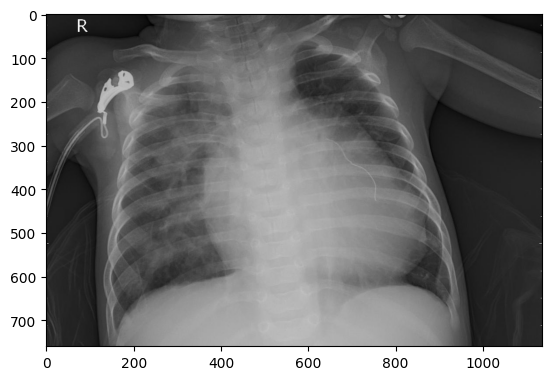

In [11]:
pneumonia_sample = imread(train_dir+"/PNEUMONIA"+"/PNEUMONIA(218).jpg")
plt.imshow(pneumonia_sample)

In [12]:
pneumonia_sample.shape

(760, 1136, 3)

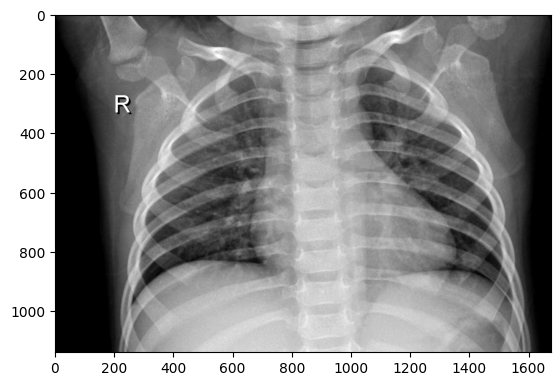

In [13]:
normal_sample = imread(train_dir+"/NORMAL"+"/NORMAL(142).jpg")
plt.imshow(normal_sample)

In [14]:
normal_sample.shape

(1140, 1676, 3)

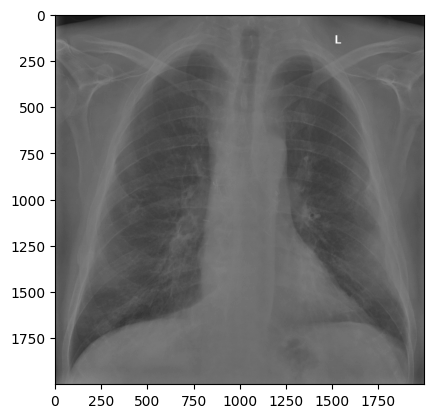

In [15]:
covid_sample = imread(train_dir+"/COVID19"+"/COVID19(189).jpg")
plt.imshow(covid_sample, cmap= "gray")

In [16]:
covid_sample.shape

(2000, 2000)

In [17]:
image_size = (200,200,3)

In [18]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [19]:
train_generator = generator.flow_from_directory (
    train_dir,
    target_size=image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 5153 images belonging to 3 classes.


In [20]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [21]:
test_generator = generator.flow_from_directory (
    test_dir,
    target_size=image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [22]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(200,200,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(132,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(60,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [24]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
162/162 [==============================] - 1388s 8s/step - loss: 1.0499 - accuracy: 0.7347 - val_loss: 0.4319 - val_accuracy: 0.8315
Epoch 2/10
162/162 [==============================] - 227s 1s/step - loss: 0.4558 - accuracy: 0.8236 - val_loss: 0.3856 - val_accuracy: 0.8261
Epoch 3/10
162/162 [==============================] - 222s 1s/step - loss: 0.3778 - accuracy: 0.8591 - val_loss: 0.3069 - val_accuracy: 0.8797
Epoch 4/10
162/162 [==============================] - 221s 1s/step - loss: 0.3534 - accuracy: 0.8651 - val_loss: 0.2832 - val_accuracy: 0.8874
Epoch 5/10
162/162 [==============================] - 221s 1s/step - loss: 0.3281 - accuracy: 0.8742 - val_loss: 0.3189 - val_accuracy: 0.8859
Epoch 6/10
162/162 [==============================] - 218s 1s/step - loss: 0.3101 - accuracy: 0.8828 - val_loss: 0.2640 - val_accuracy: 0.9037
Epoch 7/10
162/162 [==============================] - 218s 1s/step - loss: 0.2974 - accuracy: 0.8890 - val_loss: 0.2340 - val_accuracy: 0.913

In [25]:
Score=model.evaluate(train_generator,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.21673108637332916
Train Accuracy 0.9169415831565857


<function matplotlib.pyplot.show(close=None, block=None)>

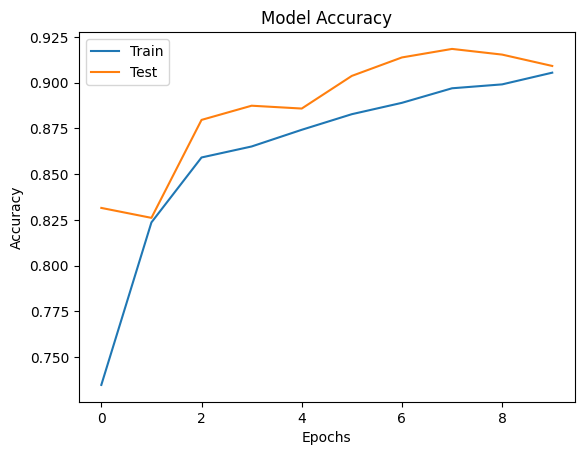

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

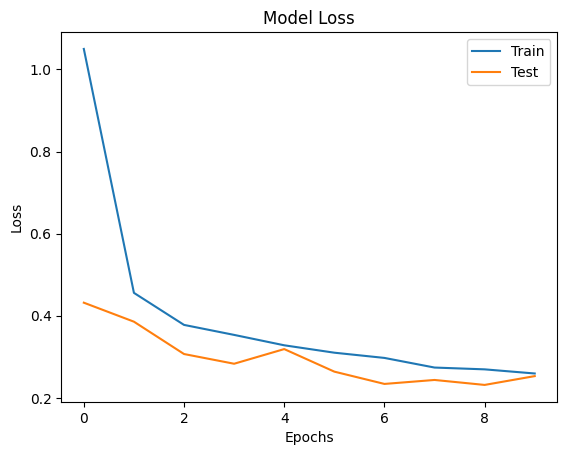

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])
plt.show

In [28]:
model.save("/content/drive/MyDrive/Data Covid19_Exam/covid.h5")

In [29]:
model_CNN=load_model('/content/drive/MyDrive/Data Covid19_Exam/covid.h5')

Prediction


In [30]:
predictions = model.predict(test_generator)
pred_labels = np.argmax(predictions, axis = 1)

41/41 [==============================] - 42s 1s/step


Image testing

1/1 [==============================] - 0s 105ms/step
PNEUMONIA


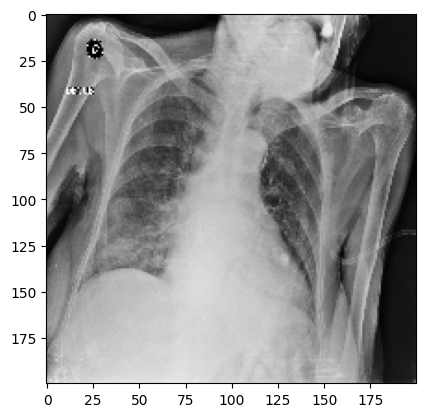

In [31]:
img=load_img("/content/drive/MyDrive/Data Covid19_Exam/test/COVID19/COVID19(460).jpg",target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='COVID19'
if round(result[0][1])==1:
  prediction='NORMAL'
if round(result[0][2])==1:
  prediction='PNEUMONIA'
print(prediction)

1/1 [==============================] - 0s 25ms/step
PNEUMONIA


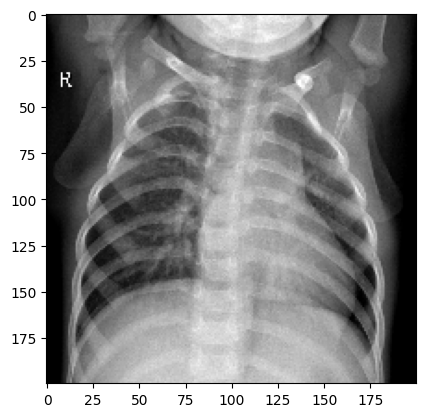

In [32]:
img=load_img("/content/drive/MyDrive/Data Covid19_Exam/test/NORMAL/NORMAL(1268).jpg",target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='COVID19'
if round(result[0][1])==1:
  prediction='NORMAL'
if round(result[0][2])==1:
  prediction='PNEUMONIA'
print(prediction)

1/1 [==============================] - 0s 22ms/step
PNEUMONIA


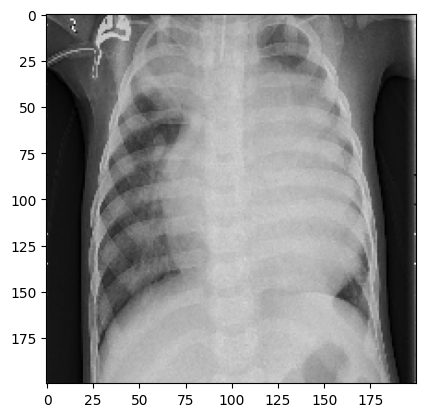

In [33]:
img=load_img("/content/drive/MyDrive/Data Covid19_Exam/test/PNEUMONIA/PNEUMONIA(3422).jpg",target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='COVID19'
if round(result[0][1])==1:
  prediction='NORMAL'
if round(result[0][2])==1:
  prediction='PNEUMONIA'
print(prediction)